<a href="https://colab.research.google.com/github/amitkatoch2021/cv/blob/master/Programming_Languages_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [6]:
df=pd.read_csv("QueryResults.csv",names=['Date','Tag','Posts'],header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [7]:
df.head()

,Date,Tag,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,507
4,2008-08-01 00:00:00,c++,163


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [8]:
df.shape

(2258, 3)

**Challenge**: Count the number of entries in each column of the dataframe

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [9]:
df.count()

Date     2258
Tag      2258
Posts    2258
dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [14]:
df.groupby('Tag').count()

,Date,Posts
Tag,,
assembly,163,163
c,163,163
c#,164,164
c++,163,163
delphi,163,163
go,148,148
java,163,163
javascript,163,163
perl,163,163


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [17]:
df.Date[1]

'2008-08-01 00:00:00'

In [19]:
type(df.Date[1])

str

In [20]:
df.Date=pd.to_datetime(df.Date)
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,507
4,2008-08-01,c++,163


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [22]:
reshaped_df = df.pivot(index="Date",columns="Tag",values="Posts")
reshaped_df

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,164.0,28.0,160.0,121.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,221.0,2201.0,6018.0,4075.0,150.0,761.0,7766.0,16162.0,131.0,4256.0,22891.0,4740.0,479.0,1844.0
2021-11-01,311.0,2341.0,6398.0,4174.0,151.0,705.0,8290.0,15869.0,81.0,4135.0,23427.0,4629.0,449.0,1765.0
2021-12-01,289.0,2266.0,5742.0,3879.0,159.0,772.0,7564.0,15340.0,103.0,3758.0,22106.0,3929.0,437.0,1673.0


In [23]:
reshaped_df.shape

(164, 14)

In [33]:
reshaped_df.groupby('Date').sum()


Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,163.0,14.0,0.0,222.0,164.0,28.0,160.0,121.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,502.0,452.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,221.0,2201.0,6018.0,4075.0,150.0,761.0,7766.0,16162.0,131.0,4256.0,22891.0,4740.0,479.0,1844.0
2021-11-01,311.0,2341.0,6398.0,4174.0,151.0,705.0,8290.0,15869.0,81.0,4135.0,23427.0,4629.0,449.0,1765.0
2021-12-01,289.0,2266.0,5742.0,3879.0,159.0,772.0,7564.0,15340.0,103.0,3758.0,22106.0,3929.0,437.0,1673.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [34]:
reshaped_df.count()

Tag
assembly      163
c             163
c#            164
c++           163
delphi        163
go            148
java          163
javascript    163
perl          163
php           163
python        163
r             161
ruby          163
swift         155
dtype: int64

In [39]:
reshaped_df.fillna(0,inplace=True)

In [40]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [41]:
import matplotlib.pyplot as plt

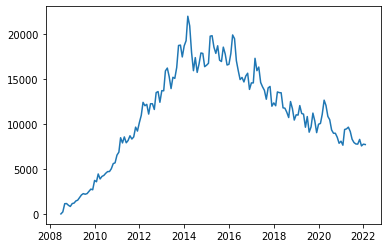

In [42]:
plt.plot(reshaped_df.index,reshaped_df['java'])

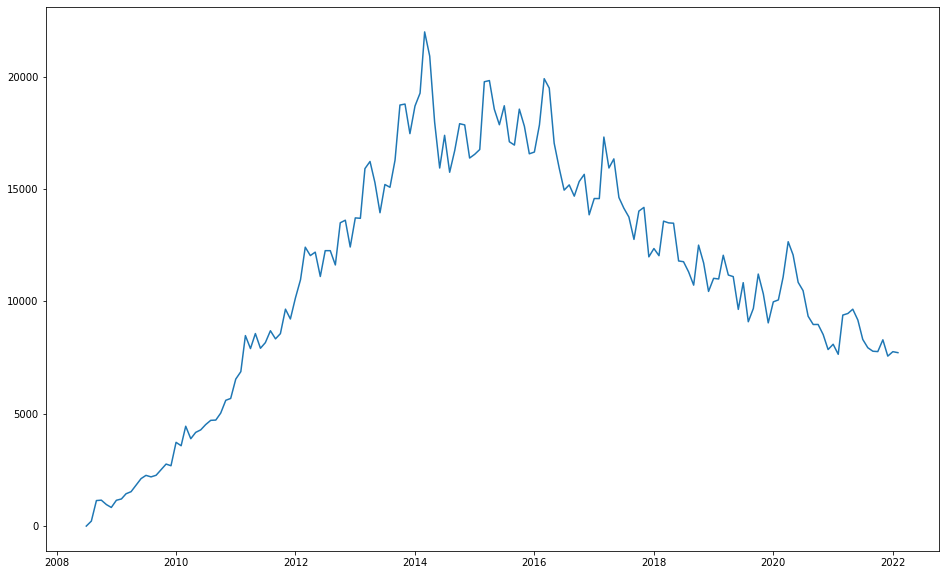

In [43]:
plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

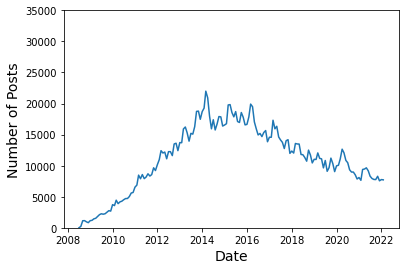

In [45]:
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

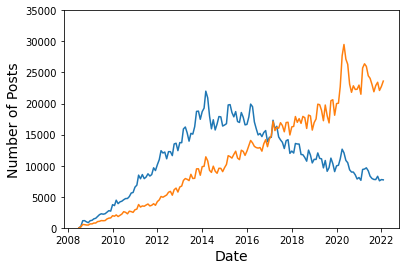

In [47]:
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index,reshaped_df['python'])

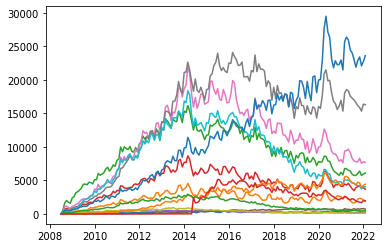

In [48]:
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

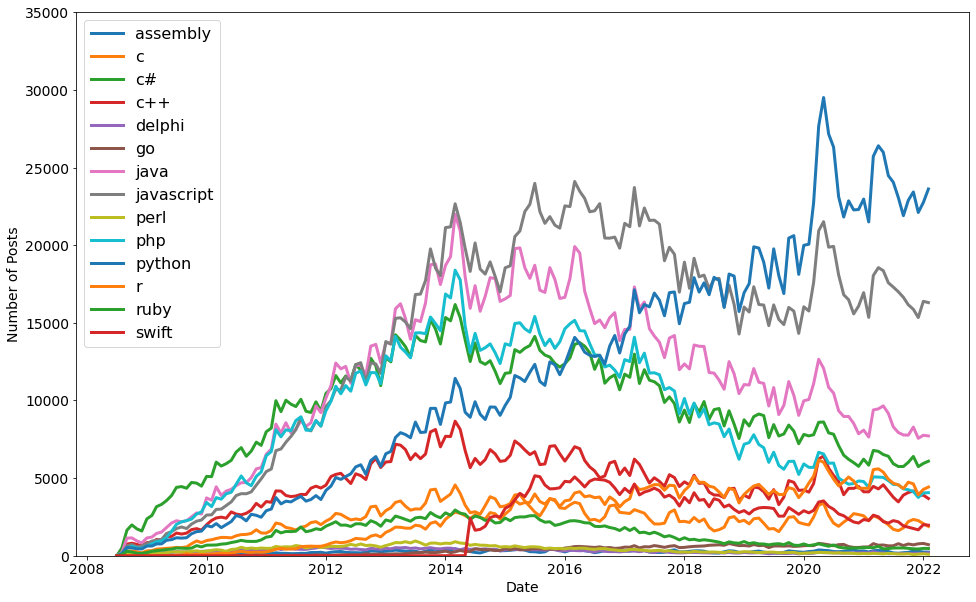

In [49]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

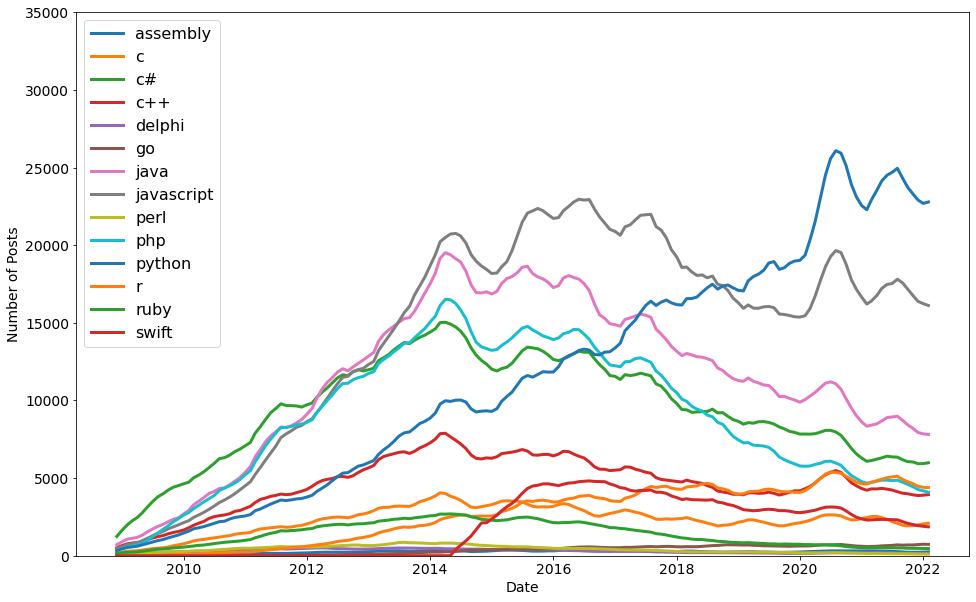

In [51]:
 #Windindow is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)